<a href="https://colab.research.google.com/github/noviaayup/melbournehousing/blob/main/Regression_%2B_Perceptron_Melbourne_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melbourne Housing - data retrieved since 2016 to predict housing price, this dataset can be found in kaggle: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot.
I would like to use this data set for one of my future skills coursework and real estate is similar to my expertise.

Loading the data
https://github.com/noviaayup/melbournehousing.git <--- To get the excel file

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data.csv


In [4]:
df = pd.read_csv("melb_data.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# **Data pre-processing and cleaning**

Find out about each datatypes, delete duplicates data, dropping null values and dropping unnecessary columns

In [7]:
df[df.duplicated()]
df_NoDuplicate = df[~ df.duplicated()]
df_NoDuplicate
df_NoDuplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
columns = df_NoDuplicate.columns
columns

In [ ]:
df_NoDuplicate.describe()

In [51]:
# Correlation between each variable

df_NoDuplicate.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [56]:
df_NoDuplicate.drop(['SellerG','Lattitude', 'Longtitude'], axis=1, inplace=True)

In [57]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0


# **Data visualisation**

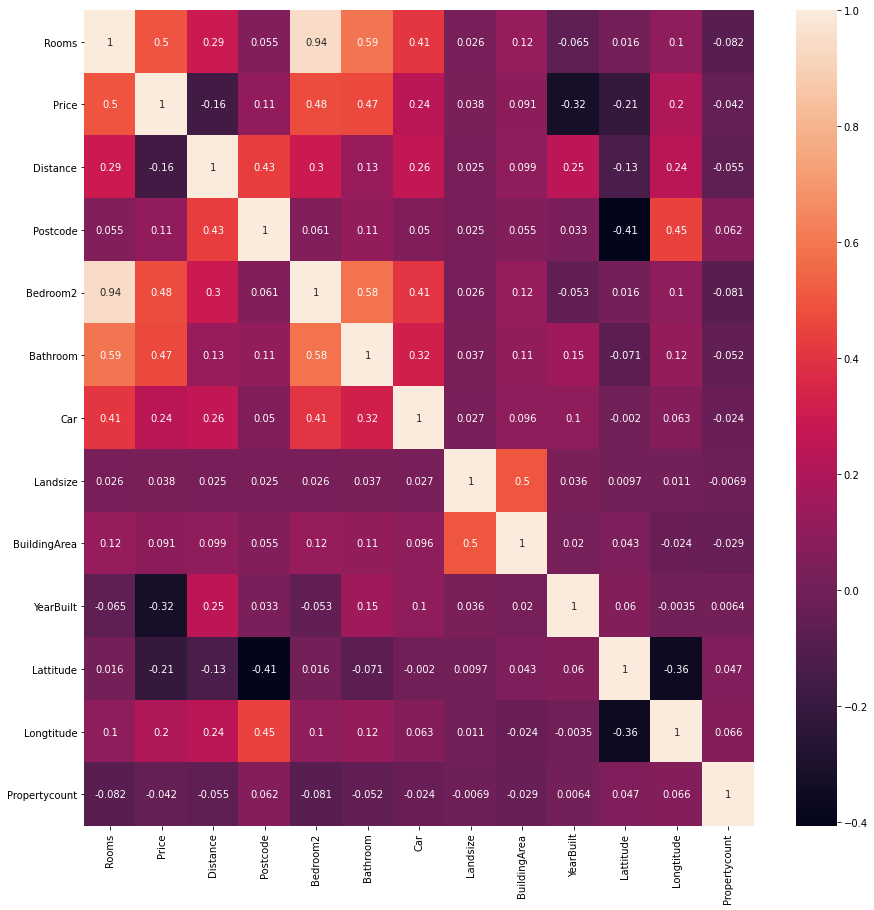

In [10]:
 # Plotting the heatmap to understand the features correlation
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_NoDuplicate.corr(),annot=True)

Feature Selection: Drop Nan price and Nan distance

In [ ]:
df_drop_NanDistance = df_NoDuplicate[~ df_NoDuplicate["Distance"].isnull()]
df_drop_NanDistance

In [ ]:
df_drop_NanPrice = df_drop_NanDistance[~ df_drop_NanDistance['Price'].isnull()]
df_drop_NanPrice

In [ ]:
for i in columns:
    count =0
    k = df[i].isnull()
    for m in k:
        if m == True :
            count = count +1
    print(i ," = ",count)

In [16]:
X_train = df_drop_NanPrice[["Distance","Bedroom2" , "Bathroom","Car" , "Landsize" , "YearBuilt"]]
Y_train = df_drop_NanPrice["Price"]
X_test = df_drop_NanPrice[["Distance","Bedroom2" , "Bathroom","Car" , "Landsize" , "YearBuilt"]]

X_train.shape , Y_train.shape , X_test.shape

((13580, 6), (13580,), (13580, 6))

In [17]:
df_drop_NanPrice.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

# **Creating linear model**

Linear Regression.
price = Method + Bedroom2 + Bathroom + Car + Landsize 


In [19]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Splitting indepnedent and dependent features into X and y

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'],axis=1)
y = df['Price']
print(X, y)

              Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 20 columns] 0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64


# Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=123)

# Train the model

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.intercept_

1.0832010908759342

In this case, examples of linear regression :
Impact of housing size and pricing 

There are two types of linear regression :
Simple Linear Regression
&
Multivariable Linear Regression

In [45]:
model.coef_

array([0.02899668, 0.10776662])

Linear regression is a statistical approach that models the relationship between input features and output. The input features are called the independent variables, and the output is called a dependent variable. Our goal here is to predict the value of the output based on the input features by multiplying it with its optimal coefficients.

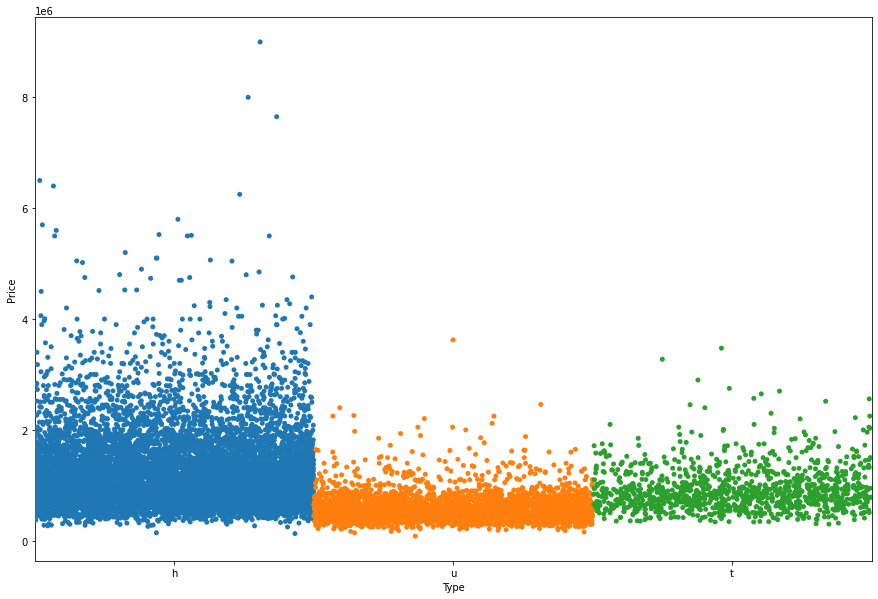

In [48]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Type', y='Price', jitter=.5)
plt.show()


Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse.

# ** Multilayer Perceptron**

The averaged perceptron method is an early and very simple version of a neural network. In this approach, inputs are classified into several possible outputs based on a linear function, and then combined with a set of weights that are derived from the feature vector—hence the name "perceptron.

Perceptron Data Algorithms

In this code below, we'll introduce the Single-Layer Perceptron (aka "Neuron" or simply "Perceptron"), the most fundamental element of nearly all modern neural network and machine learning models. We'll begin by loading the data, then visualise and actually implement the element from scratch.

How does Multilayer Perceptron work?
We can summarize the operation of the perceptron as follows it:

Step 1: Initialize the weights and bias with small-randomized values;

Step 2: Propagate all values in the input layer until output layer(Forward Propagation)

Step 3: Update weight and bias in the inner layers(Backpropagation)

Step 4: Do it until that the stop criterion is satisfied !

In [36]:
import pandas as pd
class Perceptron:



   def __init__(self, learning_rate=0.01, n_iters=1000):
       self.lr = learning_rate
       self.n_iters = n_iters
       self.activation_func = self._unit_step_func
       self.weights = None
       self.bias = None



   def fit(self, X, y):
       n_samples, n_features = X.shape



       # init parameters
       self.weights = np.zeros(n_features)
       self.bias = 0



       y_ = np.array([1 if i > 0 else 0 for i in y])



       for _ in range(self.n_iters):
          
           for idx, x_i in enumerate(X):



               linear_output = np.dot(x_i, self.weights) + self.bias
               y_predicted = self.activation_func(linear_output)
              
               # Perceptron update rule
               update = self.lr * (y_[idx] - y_predicted)



               self.weights += update * x_i
               self.bias += update



   def predict(self, X):
       linear_output = np.dot(X, self.weights) + self.bias
       y_predicted = self.activation_func(linear_output)
       return y_predicted



   def _unit_step_func(self, x):
       return np.where(x>=0, 1, 0)

1. Set the Parameter Range: If you are not sure of the best parameters, find the optimal parameters by specifying multiple values and using the Tune Model Hyperparameters module to find the optimal configuration. The trainer iterates over multiple combinations of the settings you provided and determines the combination of values that produces the best model.

Perceptron classification accuracy 1.0


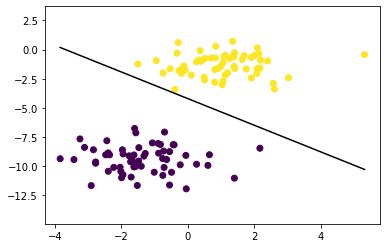

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show() 

For find the best parameters, it was necessary to realize various tests using different values to the parameters. The graphs below denote all tests made to select the best configuration for the multilayer perceptron. These tests were important in selecting the best settings and ensuring the best accuracy. The graph was drawn manually, but you can change the settings and note the results obtained. The tests involve different activation functions and the number of neurons for each layer.

2. For Learning rate, specify a value for the learning rate. The learning rate values controls the size of the step that is used in stochastic gradient descent each time the model is tested and corrected.

By making the rate smaller, you test the model more often, with the risk that you might get stuck in a local plateau. By making the step larger, you can converge faster, at the risk of overshooting the true minima.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_train, y_train)

3. For Maximum number of iterations, type the number of times you want the algorithm to examine the training data.

Stopping early often provides better generalization. Increasing the number of iterations improves fitting, at the risk of overfitting.

The following figure shows the second output, with performance data for each fold in terms of accuracy, precision, recall, F-Score, AUC, average log loss, and training log loss.

In [69]:
max_iter = 1000
class MyPerceptron:
    def __init__(self):
        """
        The constructor method of an object.
        """
        self.h = np.array([0, 1, 0], dtype=np.float)


    def compute_linear_score_with_(self, X, h):
        """
        Compute the linear function
        s[i] = <h, X[i]> + bias, <., .> represents inner product
        """
        s = None
        # HINT: the *last* element in an array is represented as a[-1]
        s = (X * h[:-1]).sum(axis=1) + h[-1]
        return s

    def predict_with_(self, X, h):
        # return 0/1 according to the linear score
        return np.sign(self.compute_linear_score_with_(X, h)).astype(np.int)

    def predict(self, X):
        return self.predict_with_(X, self.h)

    def fit(self, X, y):
        """
        :param X: training samples -- observed attribute values
        :param y: the known answer for each sample

        NOTE: now the "loss" has been encoded. You can try a customised one!
        """
        # Follow the tutorial of perpectron training
        ii = 0
        while True:
            predicted = self.predict_with_(X, self.h)
            error_indexes = np.nonzero(predicted != y)[0]
            # `nonzero` returns the indexes for multiple dimension array,
            # Here only the indexes of the first (and only) dimension is 
            # concerned, therefore the [0]

            if len(error_indexes) > 0:
                i = error_indexes[np.random.randint(len(error_indexes))]
                self.h[:-1] += X[i] * float(y[i])
                # To update the weights
                self.h[-1] += float(y[i])
                # To update the b-bias
                #   This is equivalent to using the homogeneous representation
                #   of x, where the last element is one
                print(f"{ii} Train errors: {len(error_indexes)}")
               # ii += 1
            else: 
                break 
            ii += 1
            if ii>=max_iter:
                break

In [70]:
my_model = p = Perceptron (learning_rate=0.01, n_iters=1000)
Perceptron() # initiate an object
my_model.fit(X_train, y_train)

For Random number seed, optionally type an integer value to use as the seed. Using a seed is recommended if you want to ensure reproducibility of the pipeline across runs.

Based on the cross validation results, you can tune the model parameters or decide which model to use in the scoring experiment.

In [73]:
pred_valid = my_model.predict(X_test)
valid_corr_num = (pred_valid == y_test).sum()
print("Valid accu", valid_corr_num / len(y_test))

Valid accu 1.0
